In [143]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

In [25]:
# 1. Basic Classification Methods
# Orisbay Eldana

In [27]:
# Exercise 1: Implementing Basic Classification Algorithms
# Orisbay Eldana

In [29]:
# Load a simple dataset (e.g., Iris or Wine dataset).
# Orisbay Eldana
iris = load_iris()
X = iris.data
y = iris.target

In [31]:
# Orisbay Eldana
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Implement a basic classification algorithm (e.g., Logistic Regression or K-Nearest Neighbors).
# Orisbay Eldana
log_reg = LogisticRegression(max_iter=200)

In [35]:
# Train the model and evaluate its accuracy using a test set.
# Orisbay Eldana
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

Logistic Regression Accuracy: 1.00


In [49]:
# Exercise 2: Confusion Matrix and Classification Report
# Orisbay Eldana

In [51]:
# Use the trained model to make predictions on the test set.
# Orisbay Eldana
y_pred_log_reg = log_reg.predict(X_test)

In [57]:
# Generate a confusion matrix and classification report using Scikit-learn.
# Orisbay Eldana
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [59]:
# Discuss the results, focusing on precision, recall, and F1-score.
# Orisbay Eldana
# Precision: Measures how many of the predicted positive cases were actually positive.
# Recall: Measures how many of the actual positive cases were correctly predicted.
# F1-score: The harmonic mean of precision and recall, giving a single measure of a model's accuracy.

In [62]:
# 2. Clustering Techniques
# Orisbay Eldana

In [64]:
# Exercise 3: Implementing K-Means Clustering
# Orisbay Eldana

In [74]:
# Load a dataset (e.g., customer data or a toy dataset).
# Orisbay Eldana
iris = load_iris()
X = iris.data

In [84]:
# Use K-Means to group the data into clusters.
# Orisbay Eldana
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [86]:
cluster_labels = kmeans.labels_  # Correctly define cluster labels
cluster_centers = kmeans.cluster_centers_

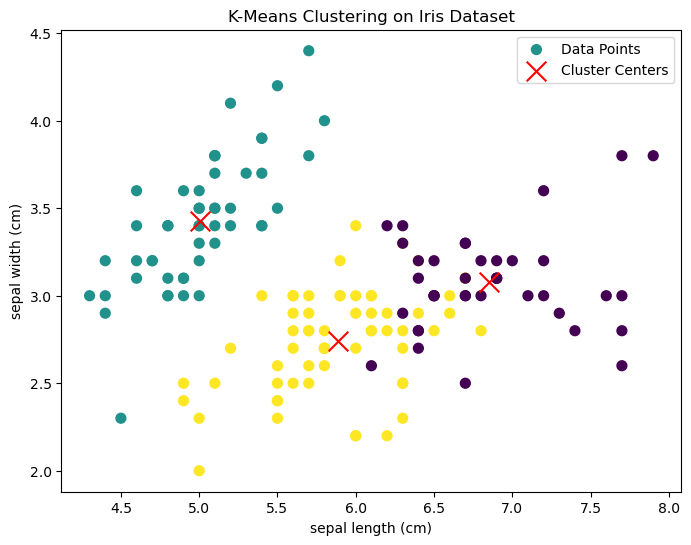

In [88]:
# Visualize the clusters using a scatter plot.
# Orisbay Eldana
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50, label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()

In [90]:
# Exercise 4: Evaluating K-Means Clustering
# Orisbay Eldana

In [98]:
# Calculate the inertia (sum of squared distances of samples to their closest cluster center).
# Orisbay Eldana
inertia_values = []
cluster_range = range(1, 11)  # Try 1 to 10 clusters

In [100]:
# Experiment with different numbers of clusters and plot the inertia to find the optimal number of clusters (Elbow Method).
# Orisbay Eldana
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

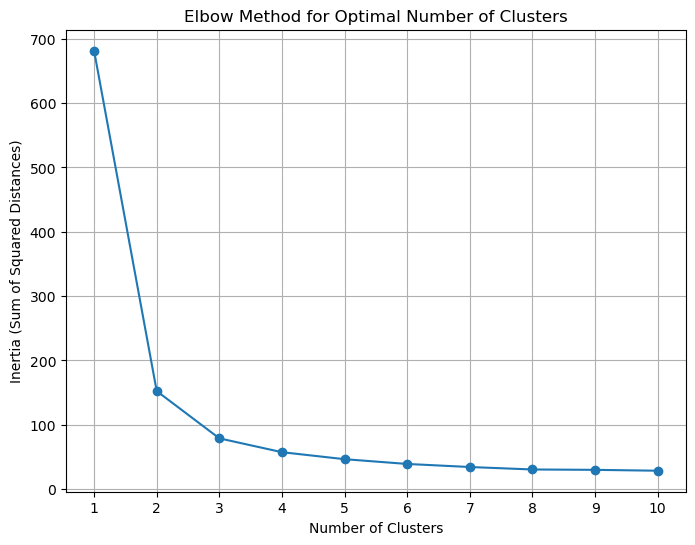

In [102]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [104]:
# Discuss the results.
# Orisbay Eldana

# Inertia: As we increase the number of clusters, inertia decreases since more clusters mean data points are closer to their cluster centers.
# However, after a certain point, the decrease in inertia becomes negligible.

# Elbow Method: From the inertia plot, the "elbow" point indicates the optimal number of clusters. 
# This is the point where adding more clusters does not significantly improve the fit, as inertia reduction flattens out.

In [109]:
# 3. Introduction to Advanced Clustering Techniques

In [111]:
# Exercise 5: Implementing Hierarchical Clustering
# Orisbay Eldana

In [129]:
# Apply Agglomerative Clustering to the same dataset used in K-Means.
# Orisbay Eldana
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)

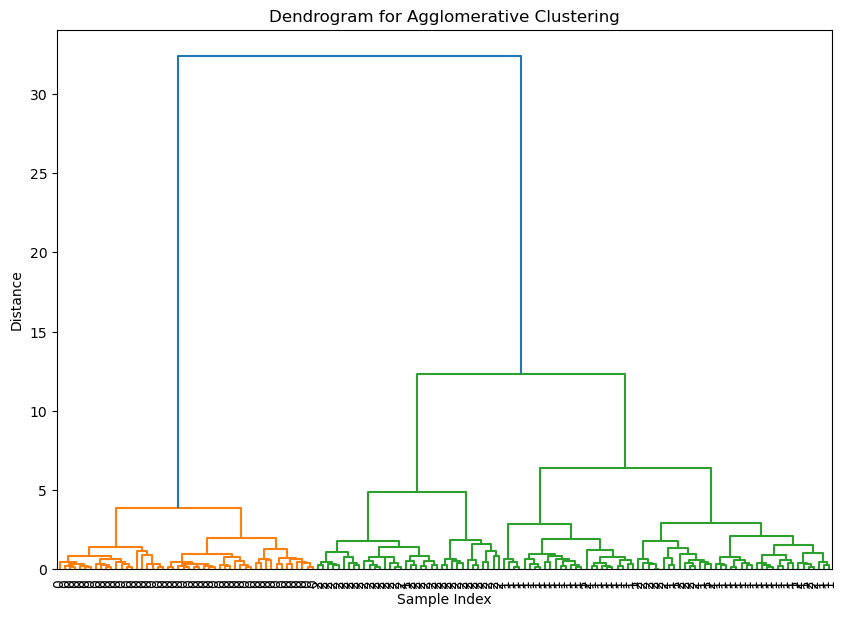

In [131]:
# Visualize the results using a dendrogram to illustrate the clustering hierarchy.
# Orisbay Eldana
linked = linkage(X, method='ward')  # 'ward' minimizes variance between clusters

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=iris.target, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [133]:
# Compare the results with those from K-Means.
# Orisbay Eldana

# Hierarchical Clustering is based on grouping similar data points step by step. 
# The dendrogram shows how clusters are merged at each step, and you can visually inspect how different samples cluster together.

# Comparison with K-Means: K-Means tends to partition the data into predefined clusters, 
# while hierarchical clustering does not require a fixed number of clusters at the start, 
# allowing you to observe different levels of clustering.

In [119]:
# Exercise 6: Introduction to DBSCAN
# Orisbay Eldana

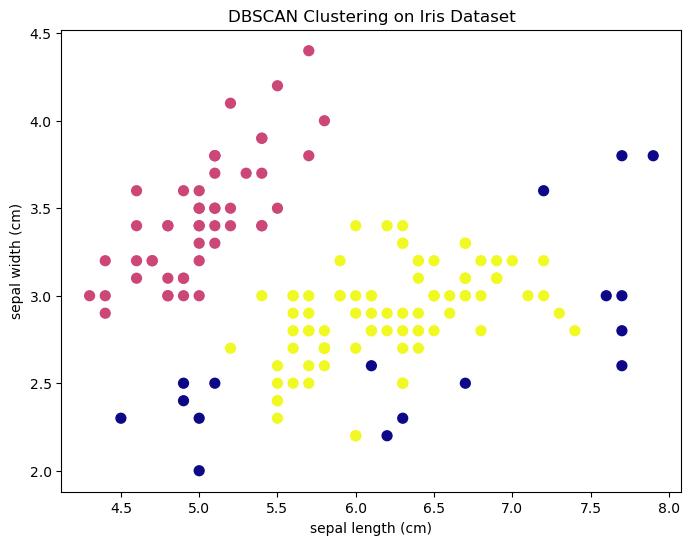

DBSCAN Labels: [-1  0  1]


In [145]:
# Implement DBSCAN on the dataset and visualize the clusters.
# Orisbay Eldana
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='plasma', marker='o', s=50)
plt.title('DBSCAN Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

print(f"DBSCAN Labels: {np.unique(dbscan_labels)}")

In [149]:
# Discuss the parameters (eps and min_samples) and their effect on clustering results.
# Orisbay Eldana
# DBSCAN can handle clusters of arbitrary shapes and identify noise (outliers) by assigning them the label -1. 
# This is different from K-Means, which assumes spherical clusters and forces all data points into clusters.

# Effect of Parameters:
# Increasing eps leads to larger clusters, as more points will be included in a neighborhood.
# Reducing min_samples makes it easier to form clusters, potentially detecting more clusters with smaller core points.

In [147]:
# Compare the performance of DBSCAN with K-Means.
# Orisbay Eldana
# K-Means is sensitive to the initial number of clusters and works best with spherical clusters, 
# while DBSCAN is better suited for identifying clusters of varying densities and shapes.
# DBSCAN also detects outliers, which K-Means does not handle explicitly.